In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
df = pd.read_csv(
    "C:\\future_intern\\Task 1\\Sample - Superstore.csv",
    encoding='latin1'
)

# --- VIEW DATA ---
print("First 5 Rows:")
display(df.head())
print("Column Names:")
print(df.columns.tolist())

print("\nDataset Info:")
df.info()



First 5 Rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Column Names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-nul

In [7]:
# Remove spaces in column names
df.columns = df.columns.str.strip()

# Convert Order Date
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Drop invalid dates
df = df.dropna(subset=['Order Date'])

print("After Cleaning:")
df.head()



After Cleaning:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
monthly = df.groupby(
    pd.Grouper(key='Order Date', freq='M')
).agg({
    'Sales':'sum',
    'Quantity':'sum',
    'Discount':'mean'
}).reset_index()

print("Monthly Aggregated Data:")
display(monthly.head())



Monthly Aggregated Data:


C:\Users\prath\AppData\Local\Temp\ipykernel_38436\3543294213.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='Order Date', freq='M')


,Order Date,Sales,Quantity,Discount
0,2014-01-31,19640.427,286,0.154795
1,2014-02-28,11833.618,244,0.145455
2,2014-03-31,7159.670,211,0.206667
3,2014-04-30,12455.482,220,0.090000
4,2014-05-31,15280.411,277,0.117105


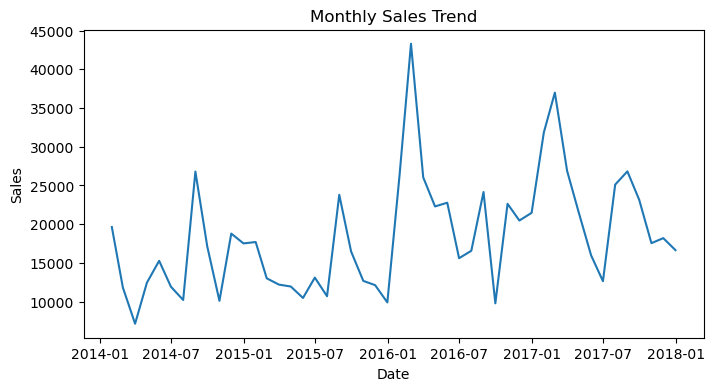

In [9]:
plt.figure(figsize=(8,4))
plt.plot(monthly['Order Date'], monthly['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [11]:
data = monthly.copy()

# Time features
data['month'] = data['Order Date'].dt.month
data['year']  = data['Order Date'].dt.year

# Lag features (previous sales impact future)
data['lag1'] = data['Sales'].shift(1)
data['lag2'] = data['Sales'].shift(2)
data['lag3'] = data['Sales'].shift(3)

# Remove rows with NaN due to lags
data = data.dropna()



In [12]:
features = ['month','year','lag1','lag2','lag3','Quantity','Discount']

X = data[features]
y = data['Sales']

split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (36, 7)
Test size : (9, 7)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(n_estimators=300, random_state=7)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("Random Forest Results")
print("MAE :", mean_absolute_error(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))


Random Forest Results
MAE : 4700.013535111147
RMSE: 5310.441533739518


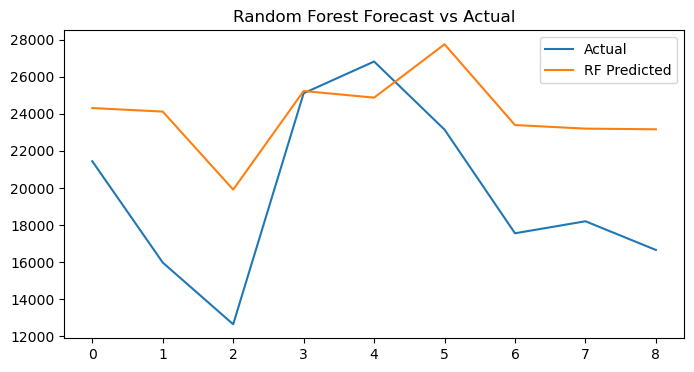

In [14]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred_rf, label="RF Predicted")
plt.legend()
plt.title("Random Forest Forecast vs Actual")
plt.show()


XGBoost Results
MAE : 3965.3758434027777
RMSE: 4329.396984737134


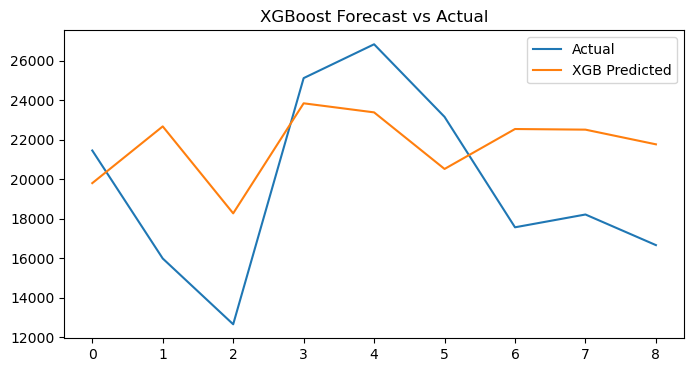

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=7
)

xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
print("MAE :", mean_absolute_error(y_test, pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_xgb)))

plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred_xgb, label="XGB Predicted")
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.show()


Linear Regression Results
MAE : 4437.6104190383885
RMSE: 5099.427520067957


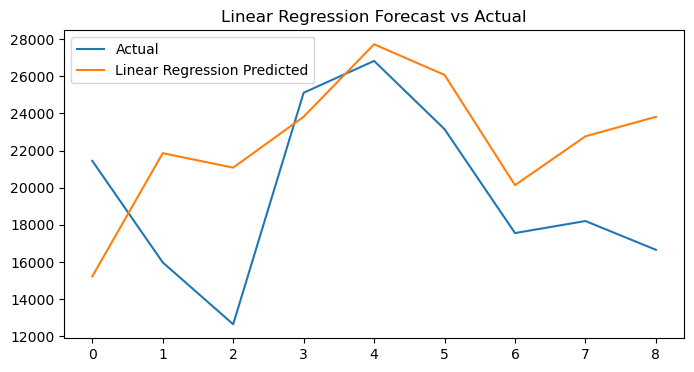

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Linear Regression Results")
print("MAE :", mean_absolute_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred_lr, label="Linear Regression Predicted")
plt.legend()
plt.title("Linear Regression Forecast vs Actual")
plt.show()


In [26]:
importances = rf.feature_importances_

for f, imp in zip(features, importances):
    print(f, ":", round(imp,3))


month : 0.128
year : 0.025
lag1 : 0.071
lag2 : 0.03
lag3 : 0.025
Quantity : 0.67
Discount : 0.049


In [27]:
last = data.iloc[-1]

future = []

for i in range(6):
    row = {
        'month': (last['month'] % 12) + 1,
        'year': last['year'] + (1 if last['month']==12 else 0),
        'lag1': last['Sales'],
        'lag2': last['lag1'],
        'lag3': last['lag2'],
        'Quantity': last['Quantity'],
        'Discount': last['Discount']
    }

    f = pd.DataFrame([row])[features]
    pred = rf.predict(f)[0]

    row['Sales'] = pred
    future.append(pred)

    last = pd.Series(row)

print("Next 6 Month Forecast:")
print(future)


Next 6 Month Forecast:
[29740.93285166664, 32807.02943666668, 27066.386483666734, 25345.888016000063, 24298.990046000054, 23960.83225333338]
